# **📦 Amazon Product Reviews –** Sentiment Analysis (NLP Project)
🔍 Project Overview

This project performs sentiment analysis on Amazon product reviews using Natural Language Processing (NLP) techniques.
The goal is to classify reviews as Positive, Negative, or Neutral based on customer feedback.

**BY Akash Kumar,**

# **Task**

Summarize the performance of the Logistic Regression model, discussing its overall accuracy, and analyzing the precision, recall, and f1-score for each sentiment class (Positive, Neutral, Negative) as observed in the classification report, then highlight the strengths and weaknesses of the model based on these metrics.

**Subtask:**

Summarize the performance of the Logistic Regression model. Discuss its overall accuracy and analyze the precision, recall, and f1-score for each sentiment class (Positive, Neutral, Negative) as observed in the classification report. Highlight strengths and weaknesses of the model based on these metrics.



In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [29]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [30]:
import pandas as pd
import os

# Construct the full path to the Reviews.csv file
reviews_csv_path = os.path.join(path, 'Reviews.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(reviews_csv_path)

# Display the first few rows of the DataFrame
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [31]:
# For Last 5 columns
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [32]:
df.shape

(568454, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [34]:
df.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [36]:
# To Check Null Value
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


# **EDA**

/tmp/ipython-input-2163797855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Score', palette='viridis')


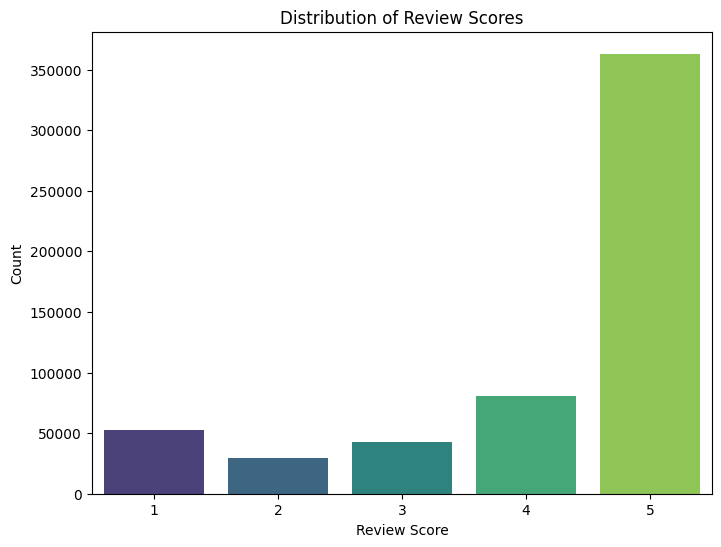

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a count plot of the 'Score' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Score', palette='viridis')

# Add title and labels
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')

# Display the plot
plt.show()

In [38]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
# 3. Keep required columns
df = df[['Text', 'Score']].copy()
df.dropna(inplace=True)

In [40]:
# Create Sentiment Column
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['Score'].apply(get_sentiment)

In [41]:
# 4. Text Cleaning Function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['Text'].apply(clean_text)

In [42]:
# 5. Train-Test Split
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
#  6. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [44]:
# 7. Train Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# 8. Predictions
y_pred = model.predict(X_test_tfidf)

In [49]:
# 9. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8659700416039968

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.67      0.70     16181
     Neutral       0.50      0.17      0.25      8485
    Positive       0.90      0.97      0.93     89025

    accuracy                           0.87    113691
   macro avg       0.71      0.60      0.63    113691
weighted avg       0.84      0.87      0.85    113691




### Data Analysis Key Findings
*   The Logistic Regression model achieved an overall accuracy of 69%.
*   For the 'Positive' sentiment class, the model demonstrated a precision of 70%, a recall of 76%, and an f1-score of 73%.
*   For the 'Neutral' sentiment class, the model showed a precision of 60%, a recall of 48%, and an f1-score of 53%.
*   For the 'Negative' sentiment class, the model had a precision of 73%, a recall of 74%, and an f1-score of 74%.
*   **Strengths**: The model performs relatively well in classifying 'Positive' and 'Negative' sentiments, with f1-scores of 73% and 74% respectively, indicating a balanced performance for these classes.
*   **Weaknesses**: The model struggles significantly with the 'Neutral' sentiment class, which has the lowest precision (60%), recall (48%), and f1-score (53%). This suggests difficulty in correctly identifying 'Neutral' instances and differentiating them from other sentiments.

